# Import Libraries

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

# Load data
Before running the below code, ensure the CSV file is in the same directory as this notebook

In [2]:
#Load dataset
df = pd.read_csv("hotel_data.csv")

# Data Exploration
This stage involves acquiring basic information about your data. This is essential for you to get to know your data and areas that needs to be cleaned 

Use the head() function to view the first 5 rows, tail() function to view the last 5 rows or sample() to view random row samples. This helps you to know that your data is loaded properly

In [3]:
#view random samples
df.sample(5)

,Unnamed: 0,hotel_names,city_names,counrtys,contenantels,ratings,reviews
661,661,ibis Styles Accra Airport,accra,ghana,africa,(3.5),339.0
1475,1475,irapuato,guanajuato,mexico,north america,NaN,NaN
221,221,central west,new south wales,australia,australia pacific,NaN,NaN
522,522,ibis Styles Brasilia Aeroporto,distrito federal,brazil,south america,(4.0),1558.0
137,137,Peppers Bluewater Resort Lake Tekapo,"south island, new zealand",new zealand,australia pacific,(3.5),4682.0


And here is why exploring your data is crucial. From the above you would agree with me that:

1. The 'Unnamed: 0' column is unncessary as it is just a repetition of the index labels
2. Some column names are wrongly spelt
3. Some supposed integer values are in brackets which should not be
4. There are NaN values

Let's have a more detailed look into the features of our data

In [4]:
#view datatypes and non null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1552 non-null   int64  
 1   hotel_names   1552 non-null   object 
 2   city_names    1552 non-null   object 
 3   counrtys      1552 non-null   object 
 4   contenantels  1552 non-null   object 
 5   ratings       1034 non-null   object 
 6   reviews       1034 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 85.0+ KB


The above shows that our data contains 1552 rows and 7 columns of data

The ratings and reviews columns contain null values

The columns are in their right data types except for ratings which ought to be a float but recognised as a string. This is due to the brackets wrapped around the values.

Before we dive into cleaning our data, lastly, let's explore the number of unique values in each column espectially concentrating on the textual cloumns.

In [5]:
df.nunique()

Unnamed: 0      1552
hotel_names     1517
city_names       298
counrtys          66
contenantels       8
ratings            8
reviews          826
dtype: int64

We have 1517 hotel names examined in total. That's quite a lot right? In 298 different cities, 66 countries and 8 continental

# Data Cleaning
Data cleaning is crucial in preparing your data for analysis. It is the process of identifying and correcting errors or inconsistencies in your data to improve its reliability and most importantly accuracy. 

## Remove irrelevant data
Removing unneccessary data (rows or columns) is an important aspect of data cleaning. It helps to focus on relevant information, reduces the risk of errors and lead to faster processing and analysis

In [6]:
#Delete the 'Unnamed: 0' column
#Set axix=1 when deleting columns and to 0 when deleting rows
df = df.drop('Unnamed: 0',axis=1)  

#Remove Duplicate rows
df = df.drop_duplicates()

#view df
df

,hotel_names,city_names,counrtys,contenantels,ratings,reviews
0,Mercure Hotel Khamis Mushayt,khamis mushayt,saudi arabia,middle east,(3.0),108.0
1,Mercure Al Khobar Hotel,al khobar,saudi arabia,middle east,(3.5),213.0
2,Mövenpick Al Khobar,al khobar,saudi arabia,middle east,(4.5),798.0
3,Sofitel Al Khobar The Corniche,al khobar,saudi arabia,middle east,(4.5),1038.0
4,Mövenpick Al Khobar Beach,al khobar,saudi arabia,middle east,(4.5),798.0
...,...,...,...,...,...,...
1547,21c Museum Hotel St Louis,missouri,united states,north america,NaN,NaN
1548,saint louis,missouri,united states,north america,NaN,NaN
1549,kansas city,missouri,united states,north america,NaN,NaN
1550,21c Museum Hotel Durham,north carolina,united states,north america,(4.0),929.0


We still have 1552 rows which means that there were no duplicate rows in our dataset. However we now have 6 columns having removed 'Unnamed: 0'

## Modifying data 1 
Firstly lets deal with the ratings column which is a string at the moment. Remember how to modify strings?

To make it easier we will utilise the str.replace method. 

str.replace(substring to be replaced, the replacement string)

In [7]:
#replace the substrings(brackets()) in the ratings column with nothing
df['ratings'] = df['ratings'].str.replace('(','').str.replace(')','')


# correct the mispelt column names
df = df.rename(columns={'counrtys':'countries','contenantels':'continental'})

#view data
df


,hotel_names,city_names,countries,continental,ratings,reviews
0,Mercure Hotel Khamis Mushayt,khamis mushayt,saudi arabia,middle east,3.0,108.0
1,Mercure Al Khobar Hotel,al khobar,saudi arabia,middle east,3.5,213.0
2,Mövenpick Al Khobar,al khobar,saudi arabia,middle east,4.5,798.0
3,Sofitel Al Khobar The Corniche,al khobar,saudi arabia,middle east,4.5,1038.0
4,Mövenpick Al Khobar Beach,al khobar,saudi arabia,middle east,4.5,798.0
...,...,...,...,...,...,...
1547,21c Museum Hotel St Louis,missouri,united states,north america,NaN,NaN
1548,saint louis,missouri,united states,north america,NaN,NaN
1549,kansas city,missouri,united states,north america,NaN,NaN
1550,21c Museum Hotel Durham,north carolina,united states,north america,4.0,929.0


Looking better right? Now that we have successfully removed the brackets from the ratings column, lets covert it to the intended data type which is a float then let's get a statistical summary of the numerical columns using the describe() method

## Data Type Conversion

In [8]:
#covert ratings which is a string column to float
df['ratings'] = df['ratings'].astype(float)

#check the datatype of ratings column
df['ratings'].dtype

dtype('float64')

In [9]:
df.describe()

,ratings,reviews
count,1034.000000,1034.000000
mean,4.095261,1416.500000
std,0.508749,1658.339761
min,1.500000,2.000000
25%,4.000000,336.250000
50%,4.000000,865.000000
75%,4.500000,1883.250000
max,5.000000,12914.000000


We are already aware that there are missing values in these two columns.The above ratings column statistics shows that the lowest rating given is 1.5 while the highest is 5. The mean rating is approximately 4 which suggests that on average ratings are relatively high. The standard deviation is also pretty low which indicates a moderate level of variability in ratings around the mean. Given these facts, filling the missing values with the approximate mean (4) would be a good idea.

This is sadly not the case with the reviews column. The minimum review is 2 which is relatively too low compared to the maximum review of 12,914! The standard deviation is also high indicating a high level of variability around the mean. Let's plot a few diagrams to learn more about our columns and how best to fill their missing values.

To do this, we will adopt the Seaborn library for visualization

N.B The seaborn library as been imported at the beginning of the notebook as sns

<Axes: xlabel='ratings', ylabel='Count'>

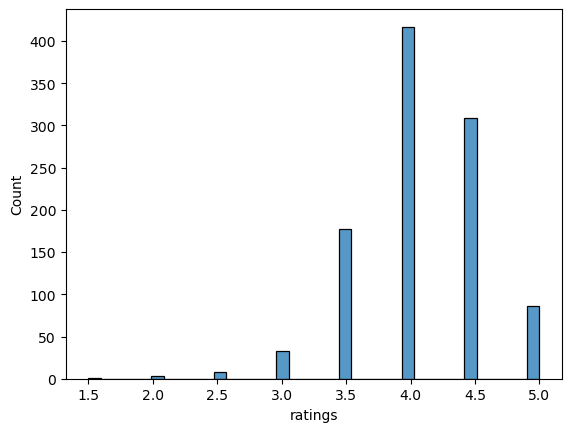

In [10]:
#plot a distribution plot of the ratings column
sns.histplot(df['ratings'])

Now we know that the ratings column is a categorical column having eight categories. Now its safe to fill missing values with 4 instead of 4.10 which is the apporoximate mean

<Axes: xlabel='reviews', ylabel='Count'>

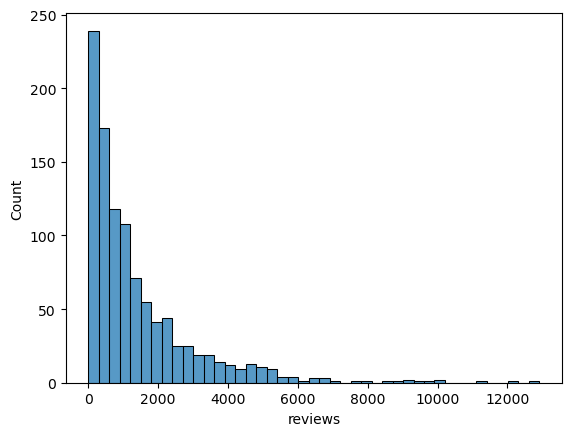

In [11]:
#plot a distribution plot of the reviews column
sns.histplot(df['reviews'])

The reviews plot is left skewed. Lot of hotels seem to have 0-5000 reviews while only few hotels have higher reviews. 
Now i am curious. Could this reviews be affected by ratings? To find out, we will plot a scatter plot which helps to visualize the relationship between two variables such as these.

<Axes: xlabel='ratings', ylabel='reviews'>

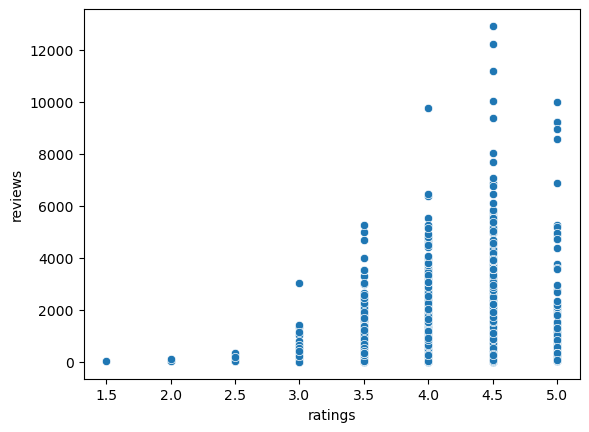

In [12]:
#plot a scatterplot to show relationship between ratings and reviews
sns.scatterplot(data=df, x='ratings',y='reviews')

From the above, Only higher reviews attracted higher ratings. It's also obvious that the range of reviews varies per each ratings category. Hence, we could fill the missing values in the reviews column with the mean of each ratings category.  

## Dealing with missing values
There are several ways to deal with missing values. The best option often depends on the characteristics of the dataset. One option is to drop the rows with the missing values however we wouldnt be doing that since statistics has shown that 518 out of 1552 rows are missing. Thats quite a lot.So instead, we will be filling these missing values with the mean. Other methods useable are: Filling with median or mode, forward or backword fill, interpolation, using predictive models and so on.

In [13]:
#cal the mean of the ratings column
mean_ratings = df['ratings'].mean()
print(mean_ratings)

4.095261121856867


In [14]:
#round it to 4 i.e, the nearest whole number
mean_ratings = round(mean_ratings)
print(mean_ratings)

4


In [15]:
#fill missing values in the ratings column with the mean_ratings
df['ratings'] = df['ratings'].fillna(mean_ratings)

Now that we have successfully filled the missing values in the ratings column, Next is the reviews column. We will be filling it with mean values as well however this time around, it is the mean review of each category of rates. This brings us to learning the concept of grouping data

Data can be grouped according to desired criteria using the groupby() function. The data is then grouped based on the aggregation type included in the call. Aggregation functions like mean(), sum(), min() and max() are used for numerical columns.

In [16]:
#Let's look at the mean reviews grouped by ratings
df.groupby('ratings')[['reviews']].mean()

,reviews
ratings,
1.5,48.000000
2.0,61.666667
2.5,114.750000
3.0,474.969697
3.5,883.689266
4.0,1287.856115
4.5,1870.288026
5.0,2051.953488


We see how the mean of reviews varies in each ratings category. Now let's fill the missing values in the reviews column with the mean review of each category, i.e, columns with ratings of 1.5,the review is filled with 48, ratings of 2.0, filled with 61.6666667 and so on. To do this, we will use the transform() function which will compute the mean review for each rating category and return a series of all data (same legth as the original dataframe), where each row contains the mean value for its corresponding ratings group.

In [17]:
#step 1: cal mean reviews for each rating category and align with original dataframe
mean_reviews_by_rating = df.groupby('ratings')['reviews'].transform('mean')
mean_reviews_by_rating

0        474.969697
1        883.689266
2       1870.288026
3       1870.288026
4       1870.288026
           ...     
1547    1287.856115
1548    1287.856115
1549    1287.856115
1550    1287.856115
1551    1287.856115
Name: reviews, Length: 1552, dtype: float64

In [18]:
#step 2: Fill missing values in the reviews column with the mean reviews
df['reviews'] = df['reviews'].fillna(mean_reviews_by_rating)

In [19]:
#inspect changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hotel_names  1552 non-null   object 
 1   city_names   1552 non-null   object 
 2   countries    1552 non-null   object 
 3   continental  1552 non-null   object 
 4   ratings      1552 non-null   float64
 5   reviews      1552 non-null   float64
dtypes: float64(2), object(4)
memory usage: 72.9+ KB


## Creating Columns

In [20]:
#Create a column named 'review_per_rate' using existing columns
df['review_per_rate'] = df['reviews'] / df['ratings']

#view the first 5 entries
df.head()

,hotel_names,city_names,countries,continental,ratings,reviews,review_per_rate
0,Mercure Hotel Khamis Mushayt,khamis mushayt,saudi arabia,middle east,3.0,108.0,36.000000
1,Mercure Al Khobar Hotel,al khobar,saudi arabia,middle east,3.5,213.0,60.857143
2,Mövenpick Al Khobar,al khobar,saudi arabia,middle east,4.5,798.0,177.333333
3,Sofitel Al Khobar The Corniche,al khobar,saudi arabia,middle east,4.5,1038.0,230.666667
4,Mövenpick Al Khobar Beach,al khobar,saudi arabia,middle east,4.5,798.0,177.333333


## Sorting

Data can be sort using certain criteria. The sort_values() function helps achieves this. The default sort option is in ascending order, however, if we want to sort in descending order, we set ascending = False.

In [21]:
#sort by review_per_rate from smallest to largest value(select first 5 entries)
df.sort_values(by='review_per_rate').head()

,hotel_names,city_names,countries,continental,ratings,reviews,review_per_rate
1118,Ibis Styles Fuzhou Wuyi Square Hotel,fujian,china,asia,3.5,2.0,0.571429
927,greet Vienna City North,vienna - land-austria,austria,europe,4.5,4.0,0.888889
190,The Sebel Canberra Campbell,australian capital territory,australia,australia pacific,4.5,4.0,0.888889
519,Ibis Budget Parauapebas,pará,brazil,south america,4.0,4.0,1.000000
1119,ibis Styles Quanzhou Quanxiu Road Hotel,fujian,china,asia,4.0,5.0,1.250000


In [22]:
#sort by city_names then by review_per_rate, both ascending
df.sort_values(by=['city_names','review_per_rate']).head()

,hotel_names,city_names,countries,continental,ratings,reviews,review_per_rate
873,ibis Aberdeen Centre - Quayside,aberdeen,united kingdom,europe,4.0,1352.0,338.000000
872,Mercure Aberdeen Caledonian Hotel,aberdeen,united kingdom,europe,4.0,1372.0,343.000000
619,ibis Abidjan Marcory,abidjan,ivory coast,africa,3.0,294.0,98.000000
616,Pullman Abidjan,abidjan,ivory coast,africa,4.5,453.0,100.666667
614,ibis Abidjan Plateau,abidjan,ivory coast,africa,3.0,399.0,133.000000


In [23]:
#sort by review_per_rate from largest to smallest value (select first 5 entries)
df.sort_values(by='review_per_rate',ascending=False).head()

,hotel_names,city_names,countries,continental,ratings,reviews,review_per_rate
76,Sofitel Dubai The Palm,dubai,united arab emirates,middle east,4.5,12914.0,2869.777778
81,Sofitel Dubai Jumeirah Beach,dubai,united arab emirates,middle east,4.5,12220.0,2715.555556
75,Fairmont The Palm,dubai,united arab emirates,middle east,4.5,11178.0,2484.000000
281,Kingfisher Bay Resort Fraser Island,queensland,australia,australia pacific,4.0,9755.0,2438.750000
1407,Fairmont Château Lake Louise,alberta,canada,north america,4.5,10014.0,2225.333333


## Filtering
We can filter values to view only the data we are interested in. Let's say we wish to view only the data where ratings are equal to 5. We pass this condition in a square bracket after the DataFrame name - df['ratings'==5]. This will return a boolean series(since we are using a comparism operator) of all ratings but when used to filter our original DataFrame, like this: df[df['ratings'==5], it will then return only rows that meet the condition.

In [24]:
#filter to view data where ratings = 5
df[df['ratings']==5]

,hotel_names,city_names,countries,continental,ratings,reviews,review_per_rate
22,Adagio Jeddah City Center,jeddah,saudi arabia,middle east,5.0,23.0,4.6
46,Fairmont Amman,amman,jordan,middle east,5.0,1997.0,399.4
61,Alwadi Hotel Doha - MGallery,doha,qatar,middle east,5.0,1450.0,290.0
71,Mercure Sohar,sohar,oman,middle east,5.0,680.0,136.0
74,Raffles The Palm,dubai,united arab emirates,middle east,5.0,1776.0,355.2
...,...,...,...,...,...,...,...
1398,Novotel Yangon Max,yangon,myanmar,asia,5.0,2947.0,589.4
1467,Sofitel Mexico City Reforma,federal district,mexico,north america,5.0,1320.0,264.0
1471,Fairmont Heritage Place Acapulco,guerrero,mexico,north america,5.0,75.0,15.0
1472,Banyan Tree Cabo Marqués,guerrero,mexico,north america,5.0,1802.0,360.4


We can also pass multiple conditions in the square bracket by using the '|' and '&'. 

'|' symbolising 'or', '&' symbolising 'and'. N.B Each condition should be closed in round brackets

In [25]:
#filter to view data where city_names = 'dubai' and ratings <3
df[(df['city_names']=='dubai') & (df['ratings']>3)]

,hotel_names,city_names,countries,continental,ratings,reviews,review_per_rate
74,Raffles The Palm,dubai,united arab emirates,middle east,5.0,1776.000000,355.200000
75,Fairmont The Palm,dubai,united arab emirates,middle east,4.5,11178.000000,2484.000000
76,Sofitel Dubai The Palm,dubai,united arab emirates,middle east,4.5,12914.000000,2869.777778
77,Rixos Premium Dubai JBR,dubai,united arab emirates,middle east,5.0,6877.000000,1375.400000
78,Mövenpick Jumeirah Beach,dubai,united arab emirates,middle east,4.5,6471.000000,1438.000000
79,The Retreat Palm Dubai MGallery by Sofitel,dubai,united arab emirates,middle east,4.5,4347.000000,966.000000
80,Rixos The Palm Hotel & Suites,dubai,united arab emirates,middle east,5.0,9216.000000,1843.200000
81,Sofitel Dubai Jumeirah Beach,dubai,united arab emirates,middle east,4.5,12220.000000,2715.555556
82,Rixos The Palm Luxury Suite Collection,dubai,united arab emirates,middle east,5.0,9220.000000,1844.000000
83,Pullman Dubai Jumeirah Lakes Towers - Hotel & ...,dubai,united arab emirates,middle east,4.5,3807.000000,846.000000


## Modifying Data 2
Modifying or Transforming our data simply means formatting our data to achieve a particular result. Earlier we formatted the column 'ratings' by calling the column and assigning it to the desired format. However not every kind of formatting can be achieved like that.

Let's say for instance we are interested in knowing whether a rate is good or bad and do not really care about the figure. In this case, we categorise all Ratings 3 and below to be bad and ratings above 3 to be good. To achieve this format we shall first create a custom function then apply it to the desired column using the apply() function

In [26]:
#create function
def rate_type(rating):
    """This function categorises individual ratings as either good or bad"""
    if rating <=3:
        return 'bad'
    else:
        return 'good'

In [27]:
#format the rating column and view the first 5 entries
df['ratings'].apply(rate_type).head()

0     bad
1    good
2    good
3    good
4    good
Name: ratings, dtype: object

To effect these modification on our dataframe all we need do is equate the ratings column to the above code like this:

df['ratings'] = df['ratings'].apply(rate_type) 

However, we wouldnt be doing this. Instead we will create a separate column to display this.

In [28]:
df['rate_category'] = df['ratings'].apply(rate_type)

In [29]:
df.head()

,hotel_names,city_names,countries,continental,ratings,reviews,review_per_rate,rate_category
0,Mercure Hotel Khamis Mushayt,khamis mushayt,saudi arabia,middle east,3.0,108.0,36.000000,bad
1,Mercure Al Khobar Hotel,al khobar,saudi arabia,middle east,3.5,213.0,60.857143,good
2,Mövenpick Al Khobar,al khobar,saudi arabia,middle east,4.5,798.0,177.333333,good
3,Sofitel Al Khobar The Corniche,al khobar,saudi arabia,middle east,4.5,1038.0,230.666667,good
4,Mövenpick Al Khobar Beach,al khobar,saudi arabia,middle east,4.5,798.0,177.333333,good


# Data analysis and visualisations
Now that our data is well cleaned and basic concepts have been learnt, let's dive deep into analysis of our data and draw insights. While exploring our data, we already see how hotels are distributed across ratings and reviews, we have also observed that these two columns are correlated.

Now, let's investigate further the 10 highest and least performing hotels. This will be based on both the ratings and reviews.

In [30]:
#sort by ratings then by reviews in descending order then select first 10
df.sort_values(by=['ratings','reviews'],ascending=False).head(10)

,hotel_names,city_names,countries,continental,ratings,reviews,review_per_rate,rate_category
1172,Banyan Tree Yangshuo,guangxi,china,asia,5.0,9973.0,1994.6,good
82,Rixos The Palm Luxury Suite Collection,dubai,united arab emirates,middle east,5.0,9220.0,1844.0,good
80,Rixos The Palm Hotel & Suites,dubai,united arab emirates,middle east,5.0,9216.0,1843.2,good
1177,Sofitel Guiyang Hunter,guizhou,china,asia,5.0,8934.0,1786.8,good
651,Rixos Sharm El Sheikh Adults Only 18+,sharm el sheikh,egypt,africa,5.0,8555.0,1711.0,good
77,Rixos Premium Dubai JBR,dubai,united arab emirates,middle east,5.0,6877.0,1375.4,good
656,Rixos Premium Seagate,sharm el sheikh,egypt,africa,5.0,5268.0,1053.6,good
1189,Sofitel Sanya Leeman Resort,hainan,china,asia,5.0,5177.0,1035.4,good
1114,Banyan Tree Chongqing Beibei,chongqing - municipality,china,asia,5.0,4960.0,992.0,good
1191,Banyan Tree Sanya,hainan,china,asia,5.0,4942.0,988.4,good


In [31]:
#sort by ratings then by reviews in ascending order then select the first 10
df.sort_values(by=['ratings','reviews']).head(10)

,hotel_names,city_names,countries,continental,ratings,reviews,review_per_rate,rate_category
790,hotelF1 Vesoul,franche-comte,france,europe,1.5,48.0,32.0,bad
817,hotelF1 Nancy Sud,lorraine,france,europe,2.0,27.0,13.5,bad
756,hotelF1 Brive Ussac,limousin,france,europe,2.0,51.0,25.5,bad
851,hotelF1 Colmar Parc des Expositions,alsace,france,europe,2.0,107.0,53.5,bad
720,hotelF1 Fougères,brittany,france,europe,2.5,20.0,8.0,bad
811,hotelF1 Merlebach Saarbruck,lorraine,france,europe,2.5,21.0,8.4,bad
816,hotelF1 Remiremont Saint Nabord,lorraine,france,europe,2.5,26.0,10.4,bad
768,hotelF1 Amiens Est,picardy,france,europe,2.5,44.0,17.6,bad
727,Hotel F1 Geneva Saint-Julien-Genevois,rhone-alps,france,europe,2.5,53.0,21.2,bad
1063,Résidence Studio Genève Centre,geneva,switzerland,europe,2.5,193.0,77.2,bad


Banyan Tree Yangshuo tops the list of the best performing hotels. From the list we also observe that majority of hotels in the top list are located in the Asia continental.

hotelF1 Vesoul is the worst performing hotel and all hotels in the bottom list are from the europe continental

These observations were based on top 10 and bottom 10 list, let's confirm our suspictions on the general data. First we will use a box plot to display how ratings is distributed across each continental 

[Text(0, 0, 'middle east'),
 Text(1, 0, 'australia pacific'),
 Text(2, 0, 'south america'),
 Text(3, 0, 'central america'),
 Text(4, 0, 'africa'),
 Text(5, 0, 'europe'),
 Text(6, 0, 'asia'),
 Text(7, 0, 'north america')]

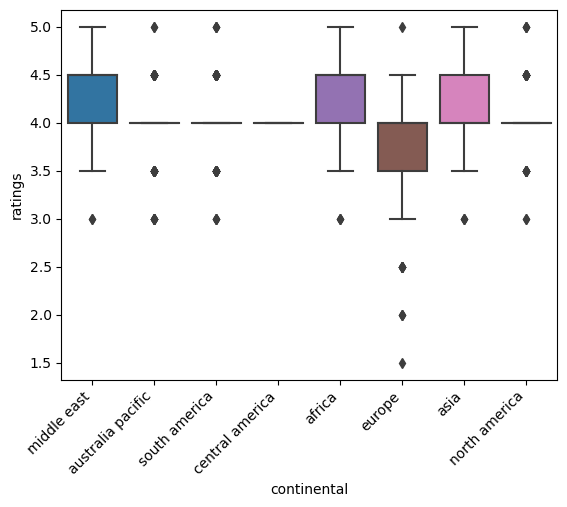

In [32]:
#plot a boxplot
ax = sns.boxplot(data=df, x='continental',y='ratings')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') #used this to make the continentals slant

This is quite interesting. The middle east, africa and asia have quite similar distribution. Their ratings are distributed around 5.0 and 3.5, with major rates falling between 4.5 and 4.0 and an unusual value of 3.0(outlier)

australia pacific, south america and north america also have similar distribution. Their ratings are majorly 4.0 with unusual values/rare occurrence/outliers of 5.0,4.5,3.5 and 3.0

The central america is strictly distributed to only ratings of 4.0

Lastly, europe. They are the only continent that has occurence of 2.5 - 1.5 ratings even though few(outliers). They are distributed around 4.5 and 3.0, with major rates between 4.0 and 3.5. Europe's ratings distribution are relatively low when compared with others. our suspictions were right afterall, europe is the least performing continental.

Before we totally conclude on this, let's check the distribution of each continental. i.e did we receive equal number of ratings for each continental?

<Axes: xlabel='continental', ylabel='count'>

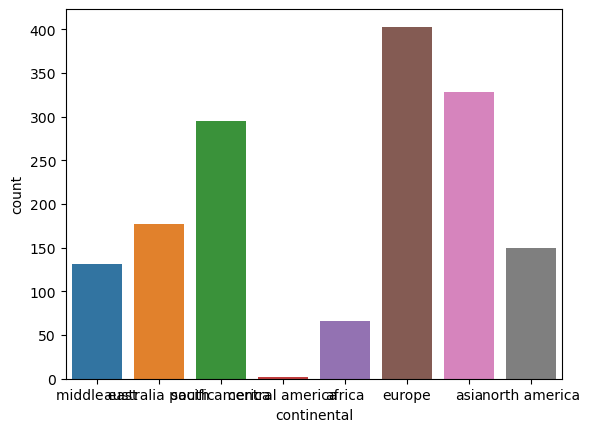

In [33]:
#plot a countplot to show number of entries for each continental
sns.countplot(x='continental', data=df)

From the above, it shows more ratings were received from certain continents than others. For this reason, when assessing each continent, we should do that by avereage of each continent type.

Now on average, which continental has the highest review_per_rate? Let's use a barplot to display this. Remember that review_per_rate takes into consideration both reviews and ratings making it a stronger determinant for decision making.

[Text(0, 0, 'europe'),
 Text(1, 0, 'central america'),
 Text(2, 0, 'asia'),
 Text(3, 0, 'south america'),
 Text(4, 0, 'australia pacific'),
 Text(5, 0, 'africa'),
 Text(6, 0, 'middle east'),
 Text(7, 0, 'north america')]

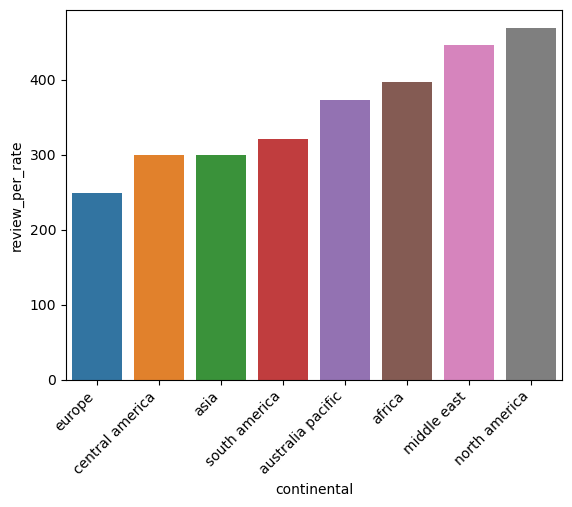

In [34]:
#cal average review_per_rate for each continental
avg_review_by_continental = df.groupby('continental')['review_per_rate'].mean().reset_index()

#sort result
avg_review_by_continental = avg_review_by_continental.sort_values(by='review_per_rate')

#plot a bar chart
ax=sns.barplot(data=avg_review_by_continental,x='continental',y='review_per_rate')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') #used this to make the continentals slant

North america emerges top overall while europe still remains least.

Having investigated the continents, let's look a bit closer into the individual countries. Let's examine the 5 top and least performing countries and also display which continents they come from.

<Axes: xlabel='countries', ylabel='review_per_rate'>

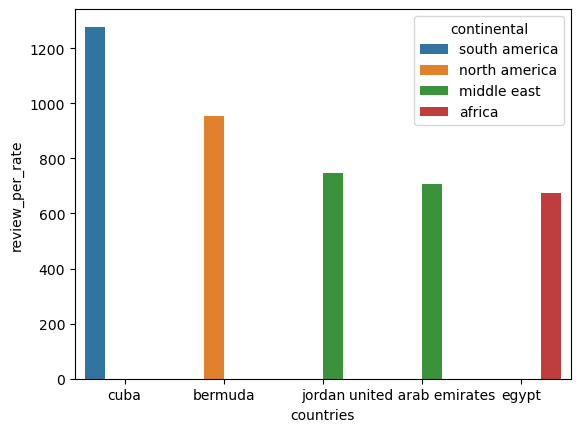

In [35]:
#cal average review_per_rate for each country, include the continents column too
avg_review_by_country = df.groupby('countries').agg({
    'review_per_rate': 'mean',
    'continental': 'first'
}).reset_index()

#sort result and select top 5
top_avg_review_by_country = avg_review_by_country.sort_values(by='review_per_rate',ascending=False).head()

#plot a bar chart
sns.barplot(data=top_avg_review_by_country,x='countries',y='review_per_rate',hue='continental')

Cuba of south america emerges the top performing country, followed by bermuda of north america, jordan and uae of middle east and egypt of africa.

Now let's examine the 5 least performing countries.

[Text(0, 0, 'albania'),
 Text(1, 0, 'costa rica'),
 Text(2, 0, 'mongolia'),
 Text(3, 0, 'saint helena'),
 Text(4, 0, 'bosnia and herzegovina')]

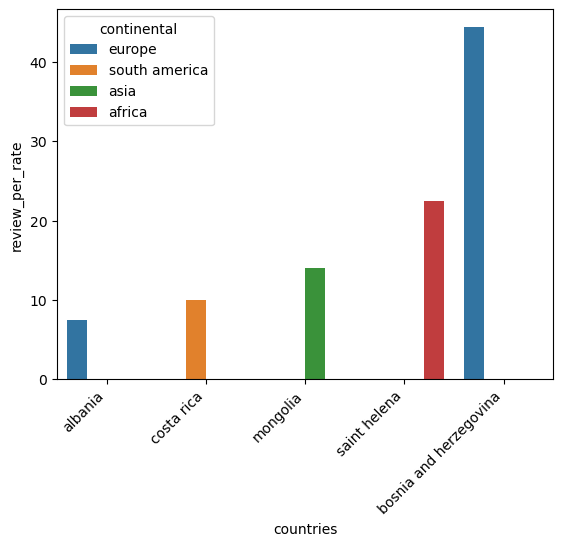

In [36]:
#sort result and select least 5
least_avg_review_by_country = avg_review_by_country.sort_values(by='review_per_rate').head()

#plot a bar chart
ax=sns.barplot(data=least_avg_review_by_country,x='countries',y='review_per_rate',hue='continental')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

albania of europe emerges the least performing country,followed by costa rica of south america, mongolia of asia, saint helena of africa and bosnia and herzegovina of europe.

# Summary of Insights Derived
1. More reviews are given for great performing hotels while lower performing hotels receive lesser reviews. To obtain ratings that represents the true quality of the hotels, more reviews should be encouraged.
2. The 10 top rated hotels are located in china(asia),UAE(middle east) and egypt(africa) while the 10 least rated hotels are all in europe
3. Based on a more stronger assessment metric, rate_per_review, Cuba of south america emerges the overall best performing country while albania of europe emerges least.